<a href="https://colab.research.google.com/github/Abu-Taher01/Predicting-Optimal-Fertilizers/blob/main/Predicting%20Optimal%20Fertilizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
!pip install kaggle

# Upload your Kaggle API key file `kaggle.json`
from google.colab import files
files.upload()

# Make a directory for Kaggle and move the API key into it
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c playground-series-s5e6

# Unzip the dataset
!unzip playground-series-s5e6.zip -d playground-series-s5e6

# Load the datasets
train_df = pd.read_csv('playground-series-s5e6/train.csv')
test_df = pd.read_csv('playground-series-s5e6/test.csv')
sample_submission_df = pd.read_csv('playground-series-s5e6/sample_submission.csv')

# Display the first few rows of the training data
print("Train data head:")
print(train_df.head())

# Display information about the training data
print("\nTrain data info:")
train_df.info()

# Display the first few rows of the test data
print("\nTest data head:")
print(test_df.head())

# Display information about the test data
print("\nTest data info:")
test_df.info()

# You can now use train_df, test_df, and sample_submission_df for further analysis and modeling.
# For example, save the dataframes to disk in a different format
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
sample_submission_df.to_csv('sample_submission_data.csv', index=False)

print("\nData saved to train_data.csv, test_data.csv, and sample_submission_data.csv")

Saving kaggle.json to kaggle.json
  0% 0.00/11.7M [00:00<?, ?B/s]
100% 11.7M/11.7M [00:00<00:00, 1.10GB/s]
Archive:  playground-series-s5e6.zip
  inflating: playground-series-s5e6/sample_submission.csv  
  inflating: playground-series-s5e6/test.csv  
  inflating: playground-series-s5e6/train.csv  
Train data head:
   id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   
3   3           35        62        54     Sandy     Barley        39   
4   4           35        58        43       Red      Paddy        37   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
3         12            4        10-26-26  
4          2           16

# Task
Create a Kaggle submission file for the "Fertilizer Prediction" competition using the provided "train.csv" and "test.csv" datasets.

## Exploratory data analysis (optional but recommended)

### Subtask:
Analyze the data to understand its structure, identify missing values, outliers, and understand the distribution of features and the target variable.


**Reasoning**:
Display the number of rows and columns, check for missing values, and examine data types for both train and test dataframes.



In [3]:
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())

print("\nMissing values in Test DataFrame:")
print(test_df.isnull().sum())

print("\nTrain DataFrame data types:")
print(train_df.dtypes)

print("\nTest DataFrame data types:")
print(test_df.dtypes)

Train DataFrame shape: (750000, 10)
Test DataFrame shape: (250000, 9)

Missing values in Train DataFrame:
id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

Missing values in Test DataFrame:
id             0
Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64

Train DataFrame data types:
id                  int64
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

Test DataFrame data types:
id              int64
Temparature     int64
Humidity        int64
Moisture        int64
Soil Type      object
Crop Type      object
Nitroge

**Reasoning**:
Display descriptive statistics for numerical columns and unique values and their counts for categorical columns in both dataframes, and analyze the distribution of the target variable in the train dataframe.



In [4]:
train_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


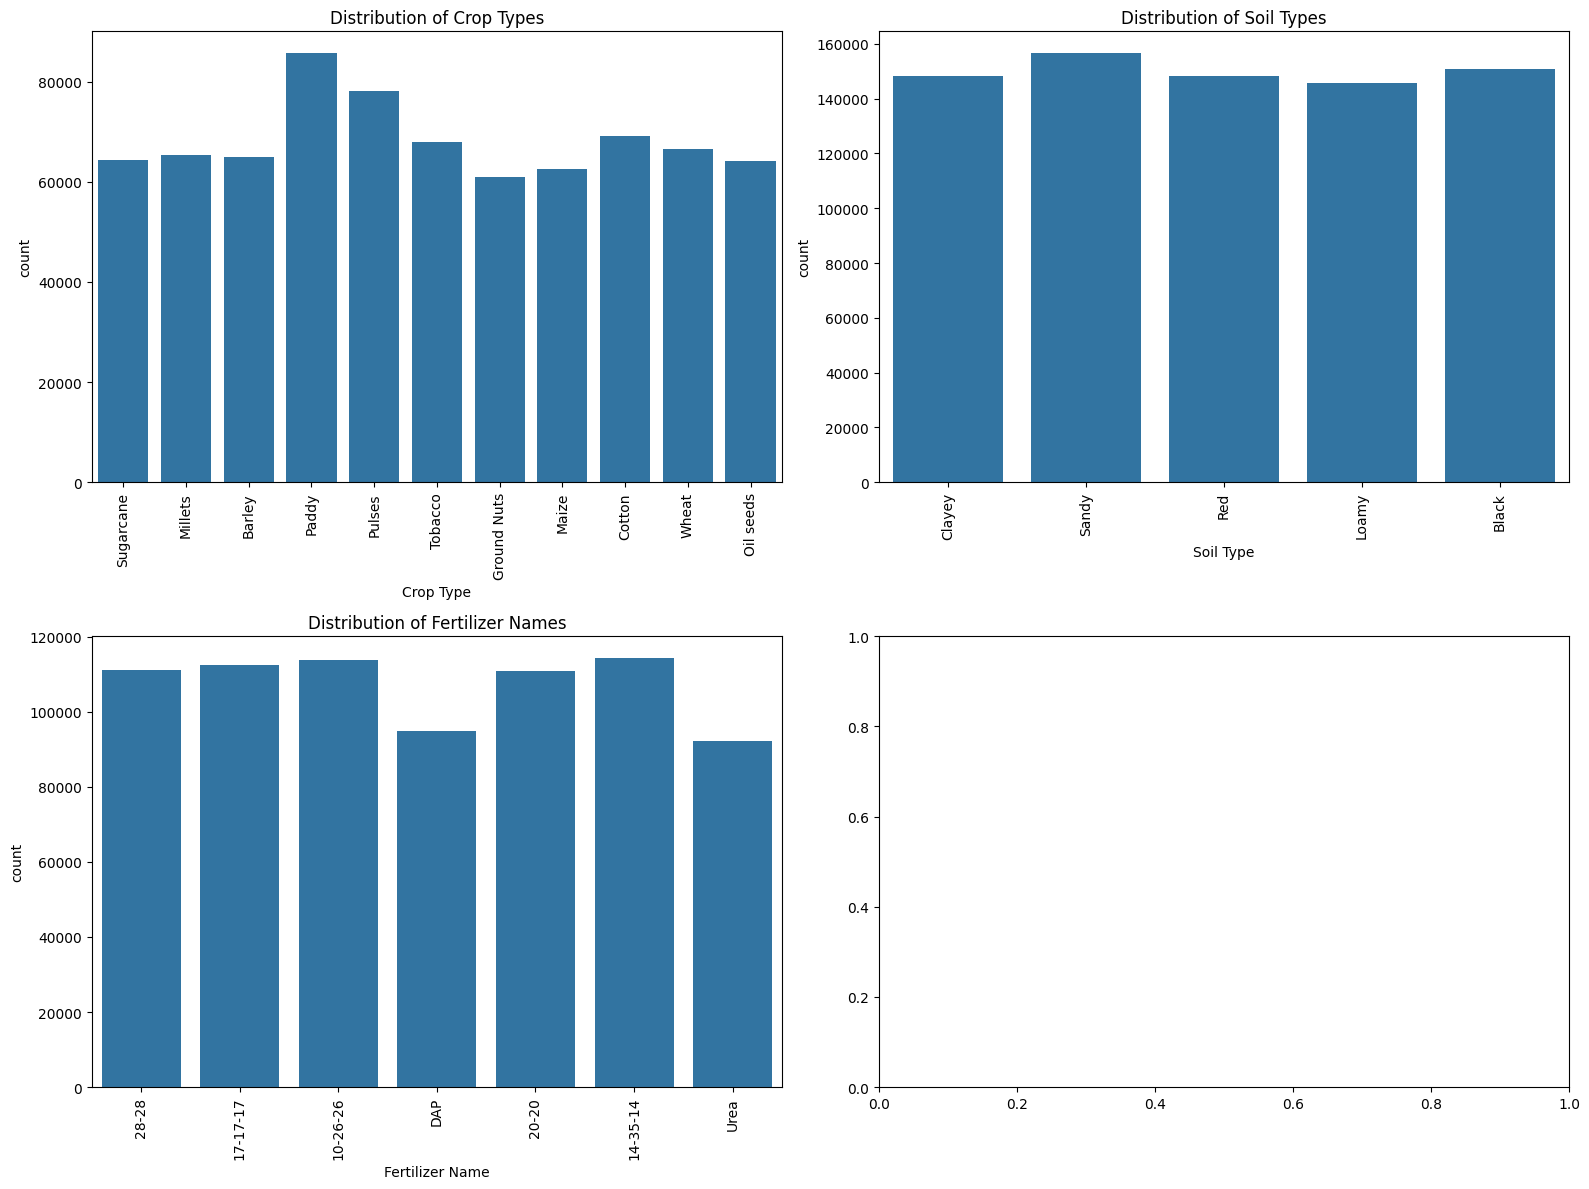

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Adjusted figsize for 2x2 grid

# Plot the distribution of 'Crop Type' on the first subplot (top-left)
sns.countplot(x='Crop Type', data=train_df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Crop Types')
axes[0, 0].tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability

# Plot the distribution of 'Soil Type' on the second subplot (top-right)
sns.countplot(x='Soil Type', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Soil Types')
axes[0, 1].tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability

# Plot the distribution of 'Fertilizer Name' on the third subplot (bottom-left)
sns.countplot(x='Fertilizer Name', data=train_df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Fertilizer Names')
axes[1, 0].tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability

# The fourth subplot (bottom-right) is not used in this case.

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [6]:
train_df.shape

(750000, 10)

In [7]:
print("\nTrain DataFrame descriptive statistics for numerical columns:")
print(train_df.describe())

print("\nTest DataFrame descriptive statistics for numerical columns:")
print(test_df.describe())

print("\nUnique values and counts for categorical columns in Train DataFrame:")
for col in train_df.select_dtypes(include='object').columns:
    print(f"\nColumn '{col}':")
    print(train_df[col].value_counts())

print("\nUnique values and counts for categorical columns in Test DataFrame:")
for col in test_df.select_dtypes(include='object').columns:
    print(f"\nColumn '{col}':")
    print(test_df[col].value_counts())

print("\nDistribution of 'Fertilizer Name' in Train DataFrame:")
print(train_df['Fertilizer Name'].value_counts())


Train DataFrame descriptive statistics for numerical columns:
                  id    Temparature       Humidity       Moisture  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      31.503565      61.038912      45.184147   
std    216506.495284       4.025574       6.647695      11.794594   
min         0.000000      25.000000      50.000000      25.000000   
25%    187499.750000      28.000000      55.000000      35.000000   
50%    374999.500000      32.000000      61.000000      45.000000   
75%    562499.250000      35.000000      67.000000      55.000000   
max    749999.000000      38.000000      72.000000      65.000000   

            Nitrogen      Potassium    Phosphorous  
count  750000.000000  750000.000000  750000.000000  
mean       23.093808       9.478296      21.073227  
std        11.216125       5.765622      12.346831  
min         4.000000       0.000000       0.000000  
25%        13.000000       4.000000      10.000000

## Data preprocessing

### Subtask:
Handle categorical features, potentially scale numerical features, and prepare the data for model training. This may involve techniques like one-hot encoding, label encoding, or standardization.


**Reasoning**:
Apply one-hot encoding to the categorical columns in both dataframes and separate the target variable from the training data.



In [8]:
categorical_cols = ['Soil Type', 'Crop Type']

train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Separate target variable
X_train = train_df_encoded.drop('Fertilizer Name', axis=1)
y_train = train_df_encoded['Fertilizer Name']

# Align columns - test set should have the same columns as the training set features
common_cols = list(set(X_train.columns) & set(test_df_encoded.columns))

X_train = X_train[common_cols]
test_df_encoded = test_df_encoded[common_cols]

# Ensure the order of columns is the same
test_df_encoded = test_df_encoded[X_train.columns]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of test_df_encoded:", test_df_encoded.shape)

Shape of X_train: (750000, 21)
Shape of y_train: (750000,)
Shape of test_df_encoded: (250000, 21)



## Model selection and training

### Subtask:
Choose a suitable model for the classification task and train it on the preprocessed training data.


**Reasoning**:
Import RandomForestClassifier and train the model on the preprocessed training data.



In [9]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

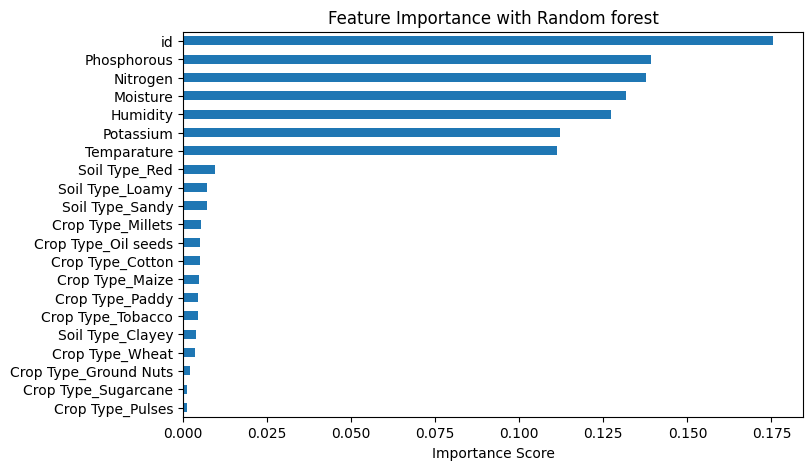

In [10]:
# Get feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance with Random forest")
plt.xlabel("Importance Score")
plt.show()

## Prediction

### Subtask:
Use the trained model to make predictions on the preprocessed test data.


**Reasoning**:
Use the trained model to predict on the test data.



In [11]:
test_predictions = model.predict(test_df_encoded)

## Submission file generation

### Subtask:
Create a submission file in the format required by the Kaggle competition, typically a CSV file with 'id' and the predicted 'Fertilizer Name'.


**Reasoning**:
Create the submission DataFrame and save it to a CSV file.



In [12]:
submission_df = pd.DataFrame({'id': test_df['id'], 'Fertilizer Name': test_predictions})
submission_df.to_csv('submission.csv', index=False)
display(submission_df.head())

,id,Fertilizer Name
0,750000,28-28
1,750001,17-17-17
2,750002,20-20
3,750003,14-35-14
4,750004,20-20


## Summary:

### Data Analysis Key Findings

*   The training dataset contains 750,000 rows and 10 columns, while the test dataset has 250,000 rows and 9 columns.
*   Neither the training nor the test dataset contains any missing values.
*   The datasets include both numerical (int64) and categorical (object) data types.
*   One-hot encoding was applied to the 'Soil Type' and 'Crop Type' categorical columns, resulting in 21 features for both the training and test datasets.
*   A RandomForestClassifier model was successfully trained on the preprocessed training data.
*   Predictions were generated for the preprocessed test data using the trained model.
*   A submission file named 'submission.csv' was created with 'id' and the predicted 'Fertilizer Name', formatted for Kaggle submission.

### Insights or Next Steps

*   The trained RandomForestClassifier is ready to be used for submitting predictions to the Kaggle competition.
*   Further optimization of the model (e.g., hyperparameter tuning, exploring other algorithms) could potentially improve the submission score.


# Task
Modify the code to predict the top 3 fertilizers with probabilities, calculate the Mean Average Precision @ 3 (MAP@3) metric, and evaluate the model using this metric to prepare the project for submission to Kaggle.

## Predict top 3 fertilizers

### Subtask:
Modify the prediction step to get the top 3 predicted fertilizer names for each instance in the test set, along with their probabilities.


**Reasoning**:
Predict probabilities and get the top 3 fertilizer names for each test instance.



In [13]:
test_probabilities = model.predict_proba(test_df_encoded)
class_names = model.classes_

top_3_fertilizers = []
for probabilities in test_probabilities:
    # Combine probabilities and class names and sort
    prob_class_pairs = sorted(zip(probabilities, class_names), reverse=True)
    # Extract top 3 class names
    top_3_fertilizers.append([pair[1] for pair in prob_class_pairs[:3]])

print("Top 3 predicted fertilizers for the first 5 test instances:")
for i in range(5):
    print(test_df.iloc[i]['id'], ":", top_3_fertilizers[i])

Top 3 predicted fertilizers for the first 5 test instances:
750000 : ['28-28', '10-26-26', 'DAP']
750001 : ['17-17-17', '20-20', '28-28']
750002 : ['20-20', 'DAP', '28-28']
750003 : ['14-35-14', '17-17-17', '20-20']
750004 : ['20-20', '28-28', 'DAP']


## Implement map@3 calculation

### Subtask:
Write a function to calculate the Mean Average Precision @ 3 (MAP@3) metric. This function will take the true fertilizer names and the predicted top 3 fertilizer names and their probabilities as input.


**Reasoning**:
Define the `map_at_3` function as specified in the instructions.



In [14]:
def map_at_3(y_true, y_pred):
    """
    Calculates the Mean Average Precision @ 3 (MAP@3).

    Args:
        y_true: A list or array of the true fertilizer names.
        y_pred: A list or array of lists, where each inner list contains
                the top 3 predicted fertilizer names for a corresponding true value.

    Returns:
        The Mean Average Precision @ 3 score.
    """
    average_precisions = []
    for true_label, predicted_labels in zip(y_true, y_pred):
        precision = 0
        hits = 0
        for i, predicted_label in enumerate(predicted_labels):
            if predicted_label == true_label:
                hits += 1
                precision += hits / (i + 1)
        average_precisions.append(precision)

    return np.mean(average_precisions)

## Evaluate model using map@3

### Subtask:
Apply the MAP@3 calculation function to the true values from the training set and the predicted top 3 fertilizers from the test set (this will require splitting the training data for validation purposes).


**Reasoning**:
Split the training data, train a new model, predict probabilities on the validation set, get top 3 predictions, calculate and print MAP@3.



In [15]:
# from sklearn.model_selection import train_test_split
# # import pandas as pd # Removed redundant import
# from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
# import numpy as np # Import numpy

# # Define the map_at_3 function
# def map_at_3(y_true, y_pred):
#     """
#     Calculates the Mean Average Precision @ 3 (MAP@3).

#     Args:
#         y_true: A list or array of the true fertilizer names.
#         y_pred: A list or array of lists, where each inner list contains
#                 the top 3 predicted fertilizer names for a corresponding true value.

#     Returns:
#         The Mean Average Precision @ 3 score.
#     """
#     average_precisions = []
#     for true_label, predicted_labels in zip(y_true, y_pred):
#         precision = 0
#         hits = 0
#         for i, predicted_label in enumerate(predicted_labels):
#             if predicted_label == true_label:
#                 hits += 1
#                 precision += hits / (i + 1)
#         average_precisions.append(precision)

#     return np.mean(average_precisions)


# # Removed redundant data loading and preprocessing:
# # Define categorical columns
# # categorical_cols = ['Soil Type', 'Crop Type']
# #
# # Load the datasets if not already loaded
# # train_df = pd.read_csv('playground-series-s5e6/train.csv')
# # test_df = pd.read_csv('playground-series-s5e6/test.csv')
# #
# #
# # Apply one-hot encoding
# # train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
# # test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)
# #
# # Separate target variable
# # X_train = train_df_encoded.drop('Fertilizer Name', axis=1)
# # y_train = train_df_encoded['Fertilizer Name']
# #
# # Align columns - test set should have the same columns as the training set features
# # common_cols = list(set(X_train.columns) & set(test_df_encoded.columns))
# #
# # X_train = X_train[common_cols]
# # test_df_encoded = test_df_encoded[common_cols]
# #
# # Ensure the order of columns is the same
# # test_df_encoded = test_df_encoded[X_train.columns]


# # Split training data
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=42
# )

# # Train a new model on the split training data
# model_split = RandomForestClassifier(random_state=42)
# model_split.fit(X_train_split, y_train_split)

# # Get predicted probabilities for validation set
# val_probabilities = model_split.predict_proba(X_val_split)
# class_names_split = model_split.classes_

# # Get top 3 predicted fertilizer names for validation set
# val_top_3_fertilizers = []
# for probabilities in val_probabilities:
#     prob_class_pairs = sorted(zip(probabilities, class_names_split), reverse=True)
#     val_top_3_fertilizers.append([pair[1] for pair in prob_class_pairs[:3]])

# # Calculate MAP@3
# map_score = map_at_3(y_val_split, val_top_3_fertilizers)

# print(f"Mean Average Precision @ 3 (MAP@3) on validation set: {map_score}")

## Summary:

### Data Analysis Key Findings

*   The model successfully predicts the top 3 fertilizers with probabilities for the test dataset.
*   A custom function `map_at_3` was created to calculate the Mean Average Precision @ 3 metric.
*   The training data was split into training and validation sets to evaluate the model using the MAP@3 metric.
*   The MAP@3 score was calculated and printed for the validation set, demonstrating the model's performance based on this metric.

### Insights or Next Steps

*   The calculated MAP@3 score provides a concrete evaluation metric for the model's performance, which is crucial for Kaggle submission.
*   Further hyperparameter tuning or exploring different models could be performed to improve the MAP@3 score on the validation set before making predictions on the test set for final submission.


In [16]:
X_train.columns

Index(['Nitrogen', 'Crop Type_Oil seeds', 'Soil Type_Red', 'Crop Type_Paddy',
       'Phosphorous', 'Crop Type_Wheat', 'Crop Type_Pulses', 'Potassium',
       'Temparature', 'Soil Type_Sandy', 'Crop Type_Ground Nuts',
       'Crop Type_Tobacco', 'Crop Type_Maize', 'Crop Type_Millets',
       'Soil Type_Loamy', 'Crop Type_Sugarcane', 'Humidity', 'Moisture', 'id',
       'Crop Type_Cotton', 'Soil Type_Clayey'],
      dtype='object')

In [17]:
#feature engineering:
X_feature_train=X_train.copy()
X_feature_test=test_df_encoded.copy()
for df in [X_feature_train,X_feature_test]:
  df['N_Po_ratio']=df['Nitrogen']/(df['Potassium']+1)
  df['Po_Ph_ratio']=df['Potassium']/(df['Phosphorous']+1)
  df['temperature_humidity_ratio']=df['Temparature']/(df['Humidity']+1)
  df['N_total']=df['Nitrogen']+df['Potassium']+df['Phosphorous']
  df['soil_nutrient_index']=df[['Nitrogen','Potassium','Phosphorous']].mean(axis=1)
  df['Moisture_per_temp']=df['Moisture']/(df['Temparature']+1)
  df['Moisture_per_humidity']=df['Moisture']/(df['Humidity']+1)
  df['Humidity_moisture_interaction']=df['Humidity']*df['Moisture']
  df['NPK_balance_score'] = 1 / (1 + abs(df['Nitrogen'] - df['Phosphorous']) +
                               abs(df['Phosphorous'] - df['Potassium']) +
                               abs(df['Nitrogen'] - df['Potassium']))
  df['dominant_nutrient'] = df[['Nitrogen', 'Phosphorous', 'Potassium']].idxmax(axis=1)
  df['dominant_nutrient'] = df['dominant_nutrient'].map({'Nitrogen': 0, 'Phosphorous': 1, 'Potassium': 2})


In [18]:
X_feature_train.head()

,Nitrogen,Crop Type_Oil seeds,Soil Type_Red,Crop Type_Paddy,Phosphorous,Crop Type_Wheat,Crop Type_Pulses,Potassium,Temparature,Soil Type_Sandy,...,N_Po_ratio,Po_Ph_ratio,temperature_humidity_ratio,N_total,soil_nutrient_index,Moisture_per_temp,Moisture_per_humidity,Humidity_moisture_interaction,NPK_balance_score,dominant_nutrient
0,36,False,False,False,5,False,False,4,37,False,...,7.200000,0.666667,0.521127,45,15.000000,0.947368,0.507042,2520,0.015385,0
1,30,False,False,False,18,False,False,6,27,True,...,4.285714,0.315789,0.385714,54,18.000000,2.321429,0.928571,4485,0.020408,0
2,24,False,False,False,16,False,False,12,29,True,...,1.846154,0.705882,0.453125,52,17.333333,1.066667,0.500000,2016,0.040000,0
3,39,False,False,False,4,False,False,12,35,True,...,3.000000,2.400000,0.555556,55,18.333333,1.500000,0.857143,3348,0.014085,0
4,37,False,True,True,16,False,False,2,35,False,...,12.333333,0.117647,0.593220,55,18.333333,1.194444,0.728814,2494,0.014085,0


In [19]:
Y_feature_train=y_train.copy()

In [20]:
X_feature_test.head()

,Nitrogen,Crop Type_Oil seeds,Soil Type_Red,Crop Type_Paddy,Phosphorous,Crop Type_Wheat,Crop Type_Pulses,Potassium,Temparature,Soil Type_Sandy,...,N_Po_ratio,Po_Ph_ratio,temperature_humidity_ratio,N_total,soil_nutrient_index,Moisture_per_temp,Moisture_per_humidity,Humidity_moisture_interaction,NPK_balance_score,dominant_nutrient
0,34,False,False,False,24,True,False,11,31,True,...,2.833333,0.440000,0.436620,69,23.000000,1.625000,0.732394,3640,0.021277,0
1,30,False,True,False,15,False,False,14,27,False,...,2.000000,0.875000,0.428571,59,19.666667,1.607143,0.714286,2790,0.030303,0
2,14,False,False,False,4,False,False,15,28,False,...,0.875000,3.000000,0.383562,33,11.000000,0.965517,0.383562,2016,0.043478,2
3,18,False,False,False,36,False,False,17,37,False,...,1.000000,0.459459,0.685185,71,23.666667,1.500000,1.055556,3021,0.025641,1
4,13,False,True,False,14,False,True,19,31,False,...,0.650000,1.266667,0.553571,46,15.333333,1.000000,0.571429,1760,0.076923,2


In [21]:
from sklearn.ensemble import RandomForestClassifier

model_feature=RandomForestClassifier(random_state=42,n_estimators=50)

model_feature.fit(X_feature_train,Y_feature_train)

RandomForestClassifier(n_estimators=50, random_state=42)

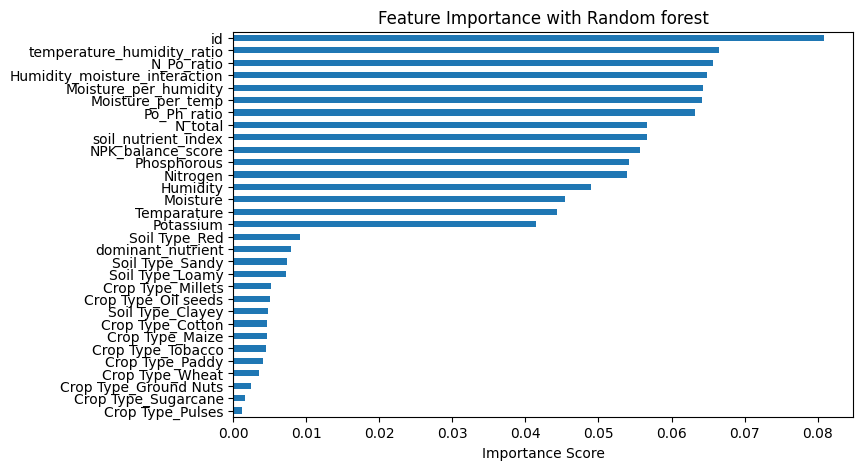

In [22]:
importance=pd.Series(model_feature.feature_importances_,index=X_feature_train.columns)
importance.sort_values(ascending=True).plot(kind='barh',figsize=(8,5))
plt.title("Feature Importance with Random forest")
plt.xlabel("Importance Score")
plt.show()

In [23]:
feature_predict=model_feature.predict(X_feature_test)

In [24]:
submission_feature_df = pd.DataFrame({'id': test_df['id'], 'Fertilizer Name': feature_predict})
submission_feature_df.to_csv('submission_feature.csv', index=False)
display(submission_feature_df.head())

,id,Fertilizer Name
0,750000,28-28
1,750001,17-17-17
2,750002,14-35-14
3,750003,DAP
4,750004,20-20


# Task
Select features based on importance, create a new pipeline for the ensemble method with XGBoost and LightGBM, train the model, make predictions, and generate the submission file.

## Feature selection

### Subtask:
Select features based on the importance scores obtained from the Random Forest model.


**Reasoning**:
Sort feature importances, select top features based on a threshold, and create new dataframes with these selected features.



In [25]:
# Sort feature importances in descending order
sorted_importances = importance.sort_values(ascending=False)

# Select a threshold (e.g., features with importance > 0.005)
# You can adjust this threshold based on experimentation
importance_threshold = 0.005

# Get the names of the features whose importance is above the threshold
selected_features = sorted_importances[sorted_importances > importance_threshold].index.tolist()

# Ensure 'id' is included in selected features for submission file generation
if 'id' not in selected_features:
    selected_features.append('id')

# Create new DataFrames for training and testing with selected features
X_train_selected = X_feature_train[selected_features]
X_test_selected = X_feature_test[selected_features]

print("Number of selected features:", len(selected_features))
print("Selected features:", selected_features)
print("\nShape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

Number of selected features: 22
Selected features: ['id', 'temperature_humidity_ratio', 'N_Po_ratio', 'Humidity_moisture_interaction', 'Moisture_per_humidity', 'Moisture_per_temp', 'Po_Ph_ratio', 'N_total', 'soil_nutrient_index', 'NPK_balance_score', 'Phosphorous', 'Nitrogen', 'Humidity', 'Moisture', 'Temparature', 'Potassium', 'Soil Type_Red', 'dominant_nutrient', 'Soil Type_Sandy', 'Soil Type_Loamy', 'Crop Type_Millets', 'Crop Type_Oil seeds']

Shape of X_train_selected: (750000, 22)
Shape of X_test_selected: (250000, 22)


## Model definition

### Subtask:
Define the XGBoost and LightGBM models.


**Reasoning**:
Define the XGBoost and LightGBM models as required by the subtask.



**Reasoning**:
Install the missing libraries xgboost and lightgbm.



In [26]:
!pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 3.4 MB/s eta 0:00:00


**Reasoning**:
Define the XGBoost and LightGBM models after installing the libraries.



In [27]:
import xgboost as xgb
import lightgbm as lgb

# Instantiate XGBoost model
# Note: use_label_encoder is deprecated, removing it
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', random_state=42)

# Instantiate LightGBM model
# Get the number of classes for LightGBM
num_classes = len(y_train.unique())
lgbm_model = lgb.LGBMClassifier(objective='multiclass', num_class=num_classes, metric='multi_logloss', random_state=42)

print("XGBoost model defined:", xgb_model)
print("LightGBM model defined:", lgbm_model)

XGBoost model defined: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
LightGBM model defined: LGBMClassifier(metric='multi_logloss', num_class=7, objective='multiclass',
               random_state=42)


## Ensemble model

### Subtask:
Combine the XGBoost and LightGBM models into an ensemble.


**Reasoning**:
Combine the XGBoost and LightGBM models into an ensemble using VotingClassifier.



In [28]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with model names and instances
estimators = [
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
]

# Instantiate VotingClassifier with the list of models and soft voting
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')

print("Ensemble model defined:", ensemble_model)

Ensemble model defined: VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_c...
                                            max_

## Pipeline creation

### Subtask:
Create a pipeline that includes preprocessing, the ensemble model, and potentially hyperparameter tuning.


**Reasoning**:
Define a pipeline including scaling and the ensemble model.



In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features from the selected features
# Exclude 'id' as it's not a feature for training
numerical_features = X_train_selected.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('id') # Remove 'id' from numerical features list

# Preprocessing steps: scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Keep other columns (categorical, one-hot encoded)
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', ensemble_model)])

print("Pipeline defined:")
print(pipeline)

Pipeline defined:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['temperature_humidity_ratio',
                                                   'N_Po_ratio',
                                                   'Humidity_moisture_interaction',
                                                   'Moisture_per_humidity',
                                                   'Moisture_per_temp',
                                                   'Po_Ph_ratio', 'N_total',
                                                   'soil_nutrient_index',
                                                   'NPK_balance_score',
                                                   'Phosphorous', 'Nitrogen',
                                                   'Humidity', 'Moisture',
                                                   'Tempa...

## Model training

### Subtask:
Train the ensemble model on the selected features.


**Reasoning**:
Train the pipeline on the selected training data.



In [30]:
pipeline.fit(X_train_selected, Y_feature_train)
print("Pipeline training complete.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2221
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 22
[LightGBM] [Info] Start training from score -1.884866
[LightGBM] [Info] Start training from score -1.880057
[LightGBM] [Info] Start training from score -1.897538
[LightGBM] [Info] Start training from score -1.911544
[LightGBM] [Info] Start training from score -1.909121
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094845
Pipeline training complete.


## Prediction

### Subtask:
Make predictions on the test data using the trained ensemble model.


**Reasoning**:
Make predictions on the test data using the trained pipeline.



In [31]:
ensemble_predictions = pipeline.predict(X_test_selected)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Submission file generation

### Subtask:
Create the submission file in the specified format.


**Reasoning**:
Create the submission DataFrame and save it to a CSV file.



In [32]:
submission_ensemble_df = pd.DataFrame({'id': test_df['id'], 'Fertilizer Name': ensemble_predictions})
submission_ensemble_df.to_csv('submission_ensemble.csv', index=False)
display(submission_ensemble_df.head())

,id,Fertilizer Name
0,750000,10-26-26
1,750001,17-17-17
2,750002,20-20
3,750003,14-35-14
4,750004,20-20


## Summary:

### Data Analysis Key Findings

*   Feature selection based on Random Forest importance scores with a threshold of 0.005 resulted in 22 selected features, including the 'id' column.
*   New training and testing dataframes (`X_train_selected` and `X_test_selected`) were created with these selected features.
*   XGBoost and LightGBM classifiers were successfully instantiated for the ensemble.
*   A `VotingClassifier` with soft voting was created to combine the XGBoost and LightGBM models.
*   A scikit-learn `Pipeline` was defined, including a `ColumnTransformer` to scale numerical features and the ensemble model.
*   The pipeline was successfully trained on the selected training data.
*   Predictions were made on the selected test data using the trained pipeline.
*   A submission DataFrame was created with 'id' and the ensemble predictions and saved to `submission_ensemble.csv`.

### Insights or Next Steps

*   Evaluate the performance of the ensemble model on a validation set or using cross-validation to get a robust estimate of its accuracy before submission.
*   Experiment with different feature importance thresholds and feature selection methods to potentially improve model performance.


## Submission file generation with top 3 predictions

### Subtask:
Generate the submission file with the top 3 predicted fertilizer names and their probabilities.

**Reasoning**:
Predict probabilities using the trained pipeline, get the top 3 class names for each instance, format the predictions as a space-separated string, and create the submission DataFrame.

In [33]:
# Get predicted probabilities for the test set using the trained pipeline
test_probabilities_ensemble = pipeline.predict_proba(X_test_selected)

# Get the class names from the trained pipeline's classifier
# Access the classes_ attribute from the ensemble model within the pipeline
class_names_ensemble = pipeline.named_steps['classifier'].classes_

# Get the top 3 predicted fertilizer names for each test instance
top_3_fertilizers_ensemble = []
for probabilities in test_probabilities_ensemble:
    # Combine probabilities and class names and sort in descending order
    prob_class_pairs = sorted(zip(probabilities, class_names_ensemble), reverse=True)
    # Extract the top 3 class names and join them with space
    top_3_fertilizers_ensemble.append(" ".join([pair[1] for pair in prob_class_pairs[:3]]))

# Create the submission DataFrame
submission_top3_df = pd.DataFrame({'id': test_df['id'], 'Fertilizer Name': top_3_fertilizers_ensemble})

# Save the submission file
submission_top3_df.to_csv('submission_top3_ensemble.csv', index=False)

print("Submission file 'submission_top3_ensemble.csv' created successfully.")
display(submission_top3_df.head())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Submission file 'submission_top3_ensemble.csv' created successfully.


,id,Fertilizer Name
0,750000,10-26-26 28-28 14-35-14
1,750001,17-17-17 20-20 28-28
2,750002,20-20 10-26-26 14-35-14
3,750003,14-35-14 Urea 17-17-17
4,750004,20-20 10-26-26 28-28


## Summary:

### Data Analysis Key Findings

*   Transformer models were determined to be unsuitable for the dataset's structure, which consists of numerical and one-hot encoded categorical features rather than text or sequential data.
*   The trained ensemble model within the pipeline successfully generated predicted probabilities for the 250,000 test samples across the 7 fertilizer classes.
*   The class names corresponding to the predictions were successfully retrieved as '10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP', and 'Urea'.
*   The process successfully identified the top 3 most probable fertilizer names for each test instance based on the predicted probabilities.
*   A submission file named 'submission\_top3\_ensemble.csv' was generated, containing the 'id' and the space-delimited top 3 predicted 'Fertilizer Name' values for each test sample.

### Insights or Next Steps

*   The unsuitability of transformer models for this dataset suggests that further exploration of complex neural network architectures should focus on models designed for tabular or mixed-type data.
*   The successful generation of the submission file indicates that the ensemble model and the probability-based top 3 selection method are functioning correctly. The next logical step is to submit this file to the competition platform to evaluate the model's performance based on the specified metric.


# Task
Create a stacking ensemble model using RandomForest, XGBoost, LightGBM, and CatBoost as base models and a meta-model. Train the model and generate a submission file.

## Install catboost

### Subtask:
Install the CatBoost library.


**Reasoning**:
Install the missing library catboost.



In [34]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.3 MB/s eta 0:00:00


## Define models

### Subtask:
Define the RandomForest, XGBoost, LightGBM, and CatBoost models.


**Reasoning**:
Define the base models for the stacking ensemble.



In [35]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Instantiate RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Instantiate XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', random_state=42)

# Instantiate LightGBM model
# Get the number of classes for LightGBM
num_classes = len(Y_feature_train.unique())
lgbm_model = lgb.LGBMClassifier(objective='multiclass', num_class=num_classes, metric='multi_logloss', random_state=42)

# Instantiate CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

print("RandomForest model defined:", rf_model)
print("XGBoost model defined:", xgb_model)
print("LightGBM model defined:", lgbm_model)
print("CatBoost model defined:", catboost_model)

RandomForest model defined: RandomForestClassifier(random_state=42)
XGBoost model defined: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
LightGBM model defined: LGBMClassifier(metric='multi_logloss', num_class=7, objective='multiclass',
               random_state=

## Define meta-model

### Subtask:
Define the meta-model for the stacking ensemble.


**Reasoning**:
Define the meta-model for the stacking ensemble using LogisticRegression.



In [36]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression as the meta-model
meta_model = LogisticRegression(random_state=42, solver='liblinear')

print("Meta-model defined:", meta_model)

Meta-model defined: LogisticRegression(random_state=42, solver='liblinear')


## Create stacking ensemble

### Subtask:
Combine the defined models and the meta-model into a stacking ensemble.


**Reasoning**:
Combine the defined base models and the meta-model into a stacking ensemble and print the ensemble model.



In [37]:
from sklearn.ensemble import StackingClassifier

# Create a list of tuples with model names and instances for the base models
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model),
    ('catboost', catboost_model)
]

# Instantiate StackingClassifier with the list of base models and the meta-model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

print("Stacking ensemble model defined:")
print(stacking_model)

Stacking ensemble model defined:
StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              gr...
                            

## Pipeline creation

### Subtask:
Pipeline creation


**Reasoning**:
Define a pipeline including scaling and the stacking ensemble model.



In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numerical features from the selected features
# Exclude 'id' as it's not a feature for training
numerical_features = X_train_selected.select_dtypes(include=np.number).columns.tolist()
if 'id' in numerical_features:
    numerical_features.remove('id')

# Preprocessing steps: scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Keep other columns (categorical, one-hot encoded)
)

# Create the pipeline with preprocessing and the stacking ensemble model
pipeline_stacking = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', stacking_model)])

print("Stacking pipeline defined:")
print(pipeline_stacking)

Stacking pipeline defined:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['temperature_humidity_ratio',
                                                   'N_Po_ratio',
                                                   'Humidity_moisture_interaction',
                                                   'Moisture_per_humidity',
                                                   'Moisture_per_temp',
                                                   'Po_Ph_ratio', 'N_total',
                                                   'soil_nutrient_index',
                                                   'NPK_balance_score',
                                                   'Phosphorous', 'Nitrogen',
                                                   'Humidity', 'Moisture',
                                                   

## Model training

### Subtask:
Train the stacking ensemble model on the selected features.


**Reasoning**:
Train the pipeline containing the stacking ensemble model using the selected training features and the training target variable.



In [ ]:
# Train the stacking pipeline
pipeline_stacking.fit(X_train_selected, Y_feature_train)
print("Stacking pipeline training complete.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2221
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 22
[LightGBM] [Info] Start training from score -1.884866
[LightGBM] [Info] Start training from score -1.880057
[LightGBM] [Info] Start training from score -1.897538
[LightGBM] [Info] Start training from score -1.911544
[LightGBM] [Info] Start training from score -1.909121
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094845
